# Kapittel 2 - Konsumentteori 2.1 - 2.4

### Substitusjons- og inntektseffekten av en prisendring
En prisendring har to effekter: (i) substitusjonseffekten som vanligvis gjør at konsumenten bytter bort fra en vare som er blitt relativt dyrere, (ii) inntektseffekten som følger av en endring i reell kjøpekraft pga en prisendring. Figuren viser dekomponeringen for en økning i prisen på gode B, hvor budsjettlinjen dreier fra $m_1$ til $m_2$.

Endring fra tilpasning i punkt a til punkt b viser substitusjonseffekten, som reduserer etterspørsel etter gode B som er blitt relativt dyrere, og øker etterspørsel etter gode A. Endring fra punkt b til punkt c viser inntektseffekten, hvor etterspørsel etter begge goder faller pga av konsumentens realinntekt har falt. I sum (ac) er etterspørsel etter gode B blitt redusert, mens etterspørselen etter gode A er uendret. For gode B går begge effektene i negativ retning (lavere etterspørsel). For gode A er substitusjonseffekten positiv og  inntektseffekten er negativ retning. Ved Cobb-Douglas-preferanser vil krysspriseffekten være null.

![Bilde](Picture2.png)

### Oppskrift for å tegne og beregne inntekts og substitusjonseffekter

Vi ser på en husholdning som har en Cobb-Douglas nyttefunksjon

$U(A,B)=A^{0.5}B^{0.5}$.

Vi antar at  $p_A=p_B=2, I=100$ i utgangspunktet, så økes prisen på gode B til 6.   

  

##### Steg 1
Før prisendringen: beregn optimal verdier på $A, B$ og finn nyttenivået som konsumenten oppnår. Tegn tilpasningen i en figur (budsjettbetingelse, oppnådd nytte og tilpasningspunkt).

##### Steg 2
Prisen på gode B økes. Finn de nye verdiene på $A, B$ og finn det nye nyttenivået. Tegn den nye budsjettlinjen, oppnådd nytte og tilpasningen inn i figuren. Beregn den totale endringen i etterspørsel etter gode 1 og 2. 

##### Steg 3
Gitt den nye prisen på gode B finn hvor mye inntekt konsumenten trenger for å oppnå nyttenivået fra Steg 1. Med denne fiktive budsjettlinjen finn konsumentens tilpasning og tegn denne i figuren.

##### Steg 4
Dekomponer den totale endringen fra Steg 2 i en substitusjonseffekt (langs indifferenskurven fra steg 1) og en inntektseffekt (fra indifferenskurven fra steg 1 til indifferenskurven fra steg 2)


In [20]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [ ]:
# symboler

A, B, I, p_A, p_B, = sp.symbols("A B I p_A p_B", real=True, positive=True)

# nytte
nytte = A**0.5*B**0.5

# steg 1

A_eq = (0.5*I)/(p_A*(0.5+0.5))
B_eq = (0.5*I)/(p_B*(0.5+0.5))



# budsjett A = I/p_A - p_BB/p_B

def budsjett(I, B, p_B, p_A):
    return I/p_A - (p_B*B/p_A)


# oppnådd nytte i likevekt

Vcd = nytte.subs([(A, A_eq), (B, B_eq)])
Vcd

# LEGG MERKE TIL AT DETTE ER EN FUNKSJON AV I
# DETTE BRUKES I STEG 3

0.5*I**1.0/(p_A**0.5*p_B**0.5)

In [ ]:
# lag funksjon for indifferenskurve
U_a=sp.symbols('U_a', real = True, positive=True)

ind_kcd = sp.solve(nytte-U_a, A)[0]
display(ind_kcd)

U_a**2/B

In [ ]:
ind_kcd_fn = sp.lambdify((B,U_a), ind_kcd)

ind_kcd_fn

<function _lambdifygenerated(B, U_a)>

In [68]:
# sett inn verdier

B_eq_num = float(B_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
A_eq_num = float(A_eq.subs([(I, 100), (p_A, 2), (p_B, 2)]))
nytte_num = float(Vcd.subs([(I, 100), (p_A, 2), (p_B, 2)]))
display(A_eq_num)
display(B_eq_num)
display(nytte_num)

25.0

25.0

25.000000000000014

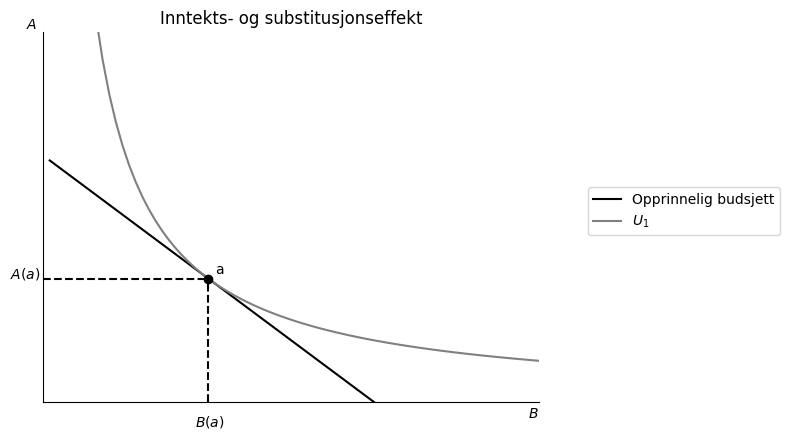

In [69]:
# tegne steg 1

# lage en akse

x=np.linspace(1.01,100, 100)

def create_ax():
                fig, ax = plt.subplots()
                # ax.set_ylabel('$A$', loc='top', rotation=0)
                ax.set_xlabel('$B$', loc='right')
                
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax


fig, ax = create_ax()
ax.set(xlim=(0,75))
ax.set(ylim=(0,75))

# ta bort tall på aksene
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.set_ylabel('$A$', loc='top', rotation=0)


ax.plot(x, budsjett(100, x, 2, 2), color='black', label='Opprinnelig budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_num), color='grey',label='$U_1$')

ax.vlines(B_eq_num, 0, A_eq_num, ls='dashed', color='black')
ax.hlines(A_eq_num, 0, B_eq_num, ls='dashed', color='black')

ax.annotate('$B(a)$', (B_eq_num-2, -5), annotation_clip=False)
ax.annotate('$A(a)$', (-5, A_eq_num), annotation_clip=False)
ax.annotate('a', (B_eq_num+1,A_eq_num+1))
ax.plot(B_eq_num, A_eq_num , marker='o', color='black')



# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

In [70]:
# Steg 2

# beregne nye verdier


B_eq_ny = float(B_eq.subs([(I, 100), (p_B, 6), (p_A, 2)]))
A_eq_ny = float(A_eq.subs([(I, 100), (p_B, 6), (p_A, 2)]))
nytte_ny = float(Vcd.subs([(I, 100), (p_B, 6), (p_A, 2)]))


display(B_eq_ny)
display(A_eq_ny)
display(nytte_ny)

8.333333333333332

25.0

14.433756729740649

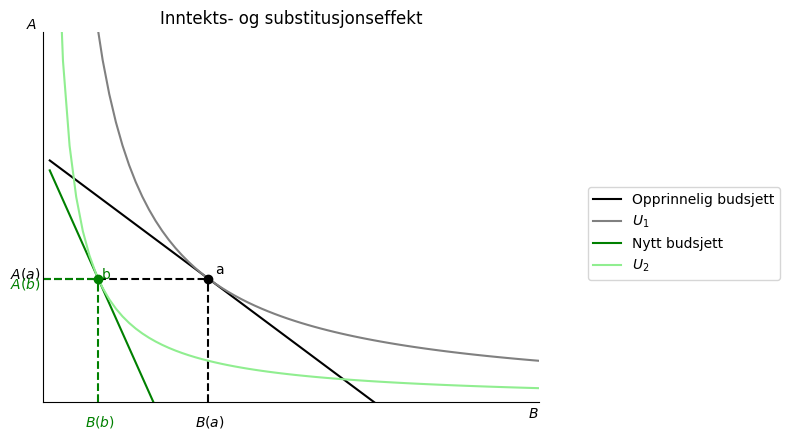

In [71]:
# legg nye verdier på tegningen

ax.plot(x, budsjett(100, x, 6, 2), color='green', label='Nytt budsjett')
ax.plot(x, ind_kcd_fn(x,nytte_ny), color='lightgreen', label='$U_2$')

ax.vlines(B_eq_ny, 0, A_eq_ny, ls='dashed', color='green')
ax.hlines(A_eq_ny, 0, B_eq_ny, ls='dashed', color='green')

ax.annotate('$B(b)$', (B_eq_ny-2, -5), color='green', annotation_clip=False)
ax.annotate('$A(b)$', (-5, A_eq_ny-2), color= 'green', annotation_clip=False)
ax.annotate('b', (B_eq_ny+.5,A_eq_ny), color='green')
ax.plot(B_eq_ny, A_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [72]:
# steg 3

# beregn fiktiv inntekt

# finn først hvordan oppnådd nytte er avhengig av inntekt gitt nye priser

V_I = Vcd.subs([(p_B, 6), (p_A, 2)])
V_I

0.144337567297406*I**1.0

In [73]:
fikt_cdm = sp.solve(V_I-nytte_num, I)
float(fikt_cdm[0])


173.20508075688826

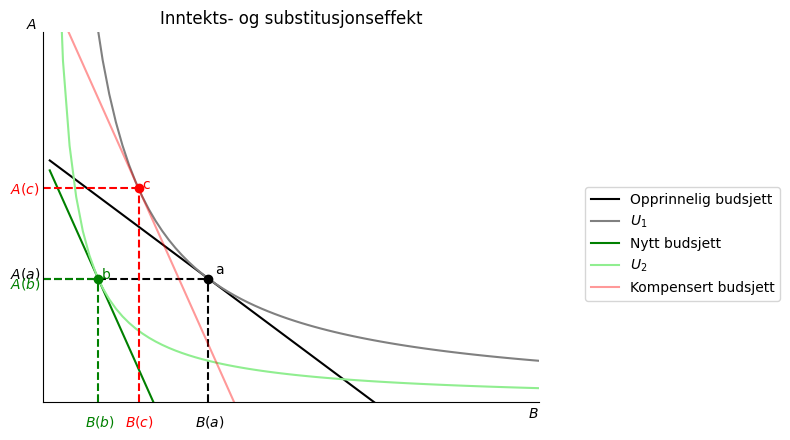

In [74]:
# fiktiv inntekt er 269.24
# med denne inntekten og de nye prisene kan konsumenten få samme nytte til de nye prisene som i utgangspunktet.

# verdier for godene med denne inntekten
Bcd_eq_komp = float(B_eq.subs([(I, float(fikt_cdm[0])), (p_B, 6), (p_A, 2)]))
Acd_eq_komp = float(A_eq.subs([(I, float(fikt_cdm[0])), (p_B, 6), (p_A, 2)]))

# tegne budsjett med denne inntekten "kompensert budsjett"

ax.plot(x, budsjett(float(fikt_cdm[0]), x, 6, 2), color='red', alpha=.4, label='Kompensert budsjett')

ax.vlines(Bcd_eq_komp, 0, Acd_eq_komp, ls='dashed', color='red')
ax.hlines(Acd_eq_komp, 0, Bcd_eq_komp, ls='dashed', color='red')

ax.annotate('$B(c)$', (Bcd_eq_komp-2, -5), color='red', annotation_clip=False)
ax.annotate('$A(c)$', (-5, Acd_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('c', (Bcd_eq_komp+.5,Acd_eq_komp), color='red')
ax.plot(Bcd_eq_komp, Acd_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Tabell kan også for å vise effektene på en ryddig måte. 

In [12]:
# generell tabell

from IPython.display import Markdown

tblcd=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | ${np.round(float(Bcd_eq_komp-B_eq_num),2)}$|${np.round(float(B_eq_ny-Bcd_eq_komp),2)}$| ${np.round(float(B_eq_ny-B_eq_num),2)}$     |
| 2 |${np.round(float(Acd_eq_komp-A_eq_num),2)}$ | ${np.round(float(A_eq_ny-Acd_eq_komp),2)}$ |  ${np.round(float(A_eq_ny-A_eq_num),2)}$    |

"""
display(Markdown(tblcd))


|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | $-10.57$|$-6.1$| $-16.67$     |
| 2 |$18.3$ | $-18.3$ |  $0.0$    |



## 2.1 Effekten av høyere strømpriser, i to steg

Anne og venninnen Beate sitter fortsatt på kafeen og diskuterer den høye strømprisen. De to godene, mat (A) og en varm bolig (B), kostet i utgangspunktet $p_B^{l} = p_A = 1$, og så dobles prisen på strøm slik at $p_B^{h} = 2$.

De har begge en inntekt på $I = 1$.

Anne har en balansert Cobb-Douglas-nyttefunksjon, mens Beate legger større vekt på en god og varm bolig, med en nyttefunksjon:

$$
U_{Beate} = A^{0.25}B^{0.75}
$$

Annes substitusjons- og inntektseffekter av prisøkningen finner vi i matteboks 2.1 i boken, men hva med Beates?

Fokuser på effekten på konsumet av gode B, og regn ut og illustrer. Sammenlign effekten av prisøkningen for de to venninnene.

## 2.2 Hvordan påvirker en renteøkning etterspørselen etter bolig og andre ting?

Du er nyutdannet siviløkonom og har fått jobb i analyseavdelingen i Norges Bank. En av dine oppgaver er å følge med på hvordan etterspørselen utvikler seg i ulike markeder. Styringsrenten er nettopp satt opp, og bankenes rente på boliglån forventes å følge etter.

Sjefen er interessert i hvordan en endring i renten påvirker ettersøprselen etter bolig og andre ting, og ber deg bruke mikroøkonomisk teori for å belyse dette spørsmålet.

Du tar utgangspunkt i at økning i renten gjør at prisen på boligkonsum, $p_B$, går opp. Og så tenker du at det kan være nyttig å bruke et talleksempel for å illustrere effektene. Du antar at husholdningen har en inntekt $I = 1$, som kan brukes på bolig (B) og andre ting (A); at prisene i utgangspunktet er $p_B^{l} = p_A = 1$; og at renteøkningen så fører til at prisen på B dobles til $p_B^{h} = 2$.

Bolig er et spesielt gode, man trenger tak over hodet. Du velger derfor å studere to ulike nyttefunksjoner: En balansert Cobb-Douglas-funksjon:

$$
U = A^{0.5}B^{0.5},
$$

hvor $A$ er andre ting og $B$ er bolig.

Og en nyttefunksjon hvor bolig er et basisgode:

$$
U = A^{0.5}(B-b)^{0.5},
$$

hvor $b$ er minstekonsumet av gode $B$, og hvor du lar være $b = 0.2$.

Du regner ut konsumet av $A$ og $B$ før og etter rentehevingen og illustrerer dine funn ved hjelp av figurer. Bruk en figur for hver nyttefunksjon, og kommenter forskjellene du ser.